# Estimation of Obesity Levels Based On Eating Habits and Physical Condition

- **Authors:**

    -  [Bitewulign Kassa Mekonnen (he/him)](https://www.linkedin.com/in/bitewulign-mekonnen/),    bitkassa2006@gmail.com
    - Yalda Rahmati
    - Richard (Rick) Harkness
    - Gulrukh Aqeel
    - Kate Antonova

- **Technical Facilitator:**

    - Phil Van-Lane(he/him) phil.vanlane@mail.utoronto.ca
- **Learning Support Staff:**

    - Aditya Kulkarni (he/him) aditya.kulkarni@mail.utoronto.ca
    - Farzaneh Hashemi (she/her) fhashemi.ma@gmail.com
    - Sergii Khomych (he/him) svkhomich1@gmail.com

Objective: Ongoing

Project Description : Ongoing

Note: Ongoing

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import label_binarize
%matplotlib inline
import time

In [21]:
data = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')
# Create a copy
df = data.copy()
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
for col in df.columns:
    print(col, df[col].dtype)

Gender object
Age float64
Height float64
Weight float64
family_history_with_overweight object
FAVC object
FCVC float64
NCP float64
CAEC object
SMOKE object
CH2O float64
SCC object
FAF float64
TUE float64
CALC object
MTRANS object
NObeyesdad object


**The public dataset in this study has 17 variables, explained below:**

1. **Gender:** data type = categorical -> male,  female

2. **Age:** data type = numeric 

3. **Height (in meters):** data type = numeric

4. **Weight (in kilograms):** data type = numeric

5. **Family history of overweight:** data type = categorical -> yes, no  

6. **FAVC (Frequently consumed high-calorie food):** data type = categorical -> yes or no 

7. **FCVC  (Frequency of consumption of vegetables):** data type = categorical (ordinal)  -> 1 = never, 2 = sometimes, 3 = always

8. **NCP (Number of  main meals):** data type = continous (ordinal) ->  1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer

9. **CAEC (Consumption of food between meals):** data type = categorical (ordinal) -> 1 = no, 2 = sometimes, 3 = frequently, 4 =always

10. **SMOKE:** data type = categorical -> yes or no

11. **CH2O (Consumption of water daily):** data type = continous (ordinal) -> 1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L

12. **SCC (Monitor calorie intake):** data type = categorical -> yes, no

13. **FAE (Frequency of physical activity):** data type = integer (ordinal) -> 1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week 

14. **TUE (Time using electronic devices):** data type = integer? (ordinal) -> 0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours 

15. **CALC (Consumption of alcohol):** data type = categorical -> 1 = no, 2 = sometimes, 3 = frequently, 4 = always 

16. **MTRANS (Type of transportation used):** data type = categorical -> automobile, motorbike, bike, public transportation, walking 

17. **NObeyesdad (Level of obesity according to body mass index):** data type = categorical -> insufficient weight normal weight, overweight level I, overweight level II, obesity type I, obesity type II, obesity type III)

In [23]:
# Check for missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [24]:

# Check the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [25]:
# dropping dublicate rows
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(2087, 17)

In [27]:
# numerical and categorical columns

numerical_columns = [col for col in df.columns if df[col].dtype != 'O']
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']

In [28]:
numerical_columns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [29]:
categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [30]:
discrete_columns = [col for col in df.columns if df[col].nunique() < 7]
continuous_columns = [col for col in df.columns if col not in discrete_columns]

In [31]:
continuous_columns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']

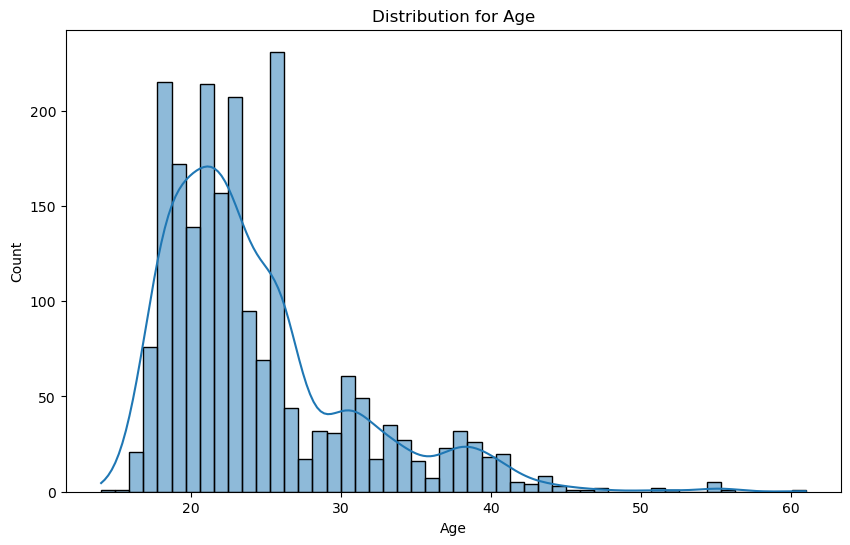

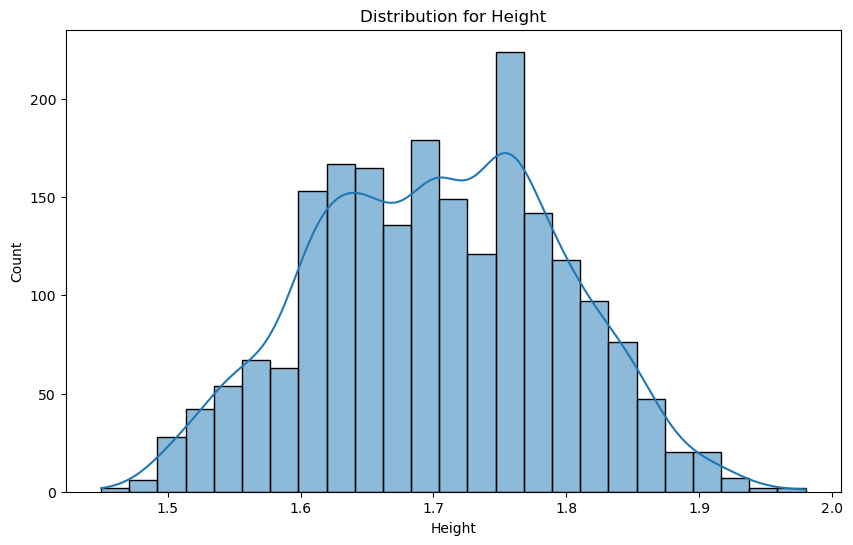

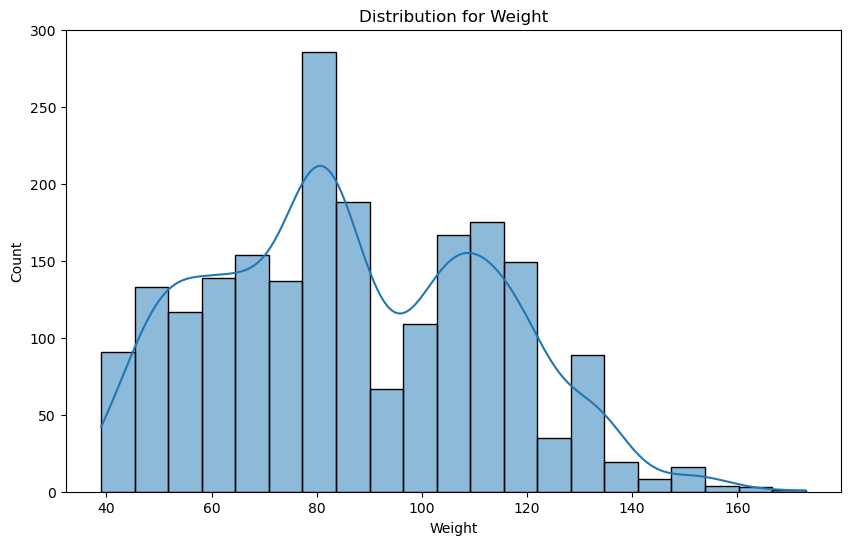

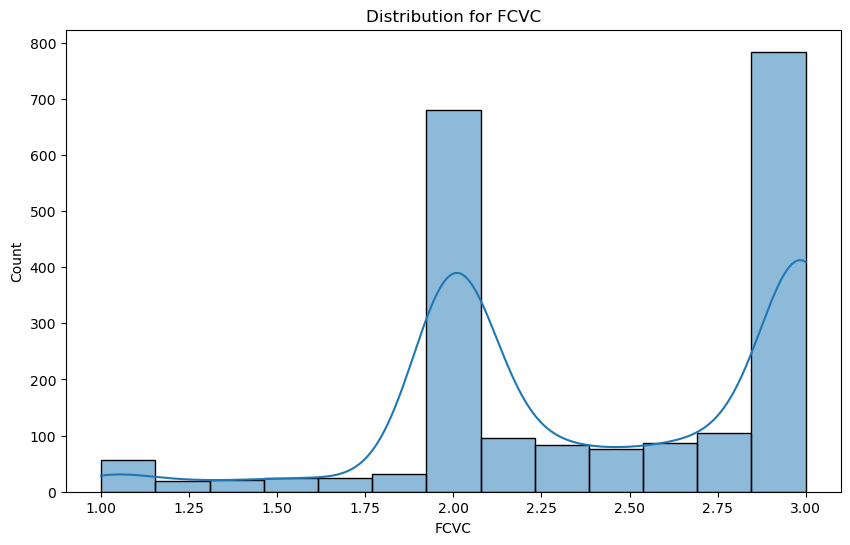

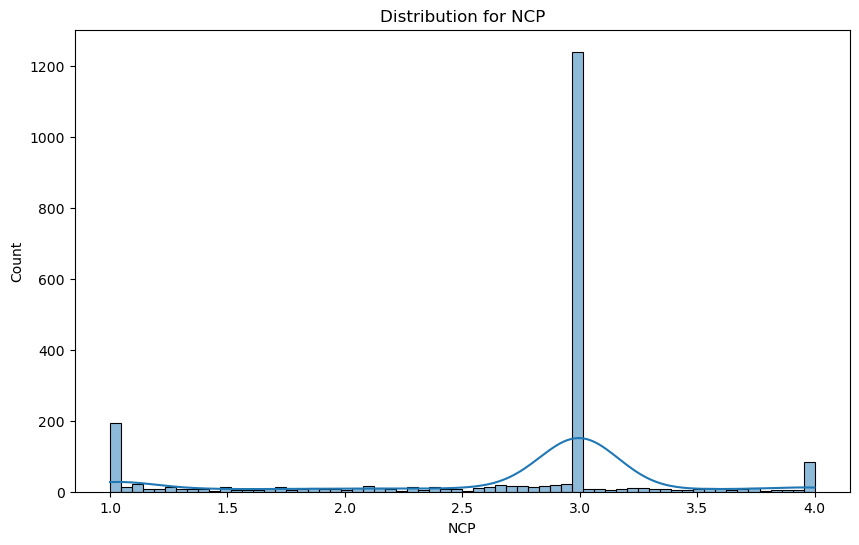

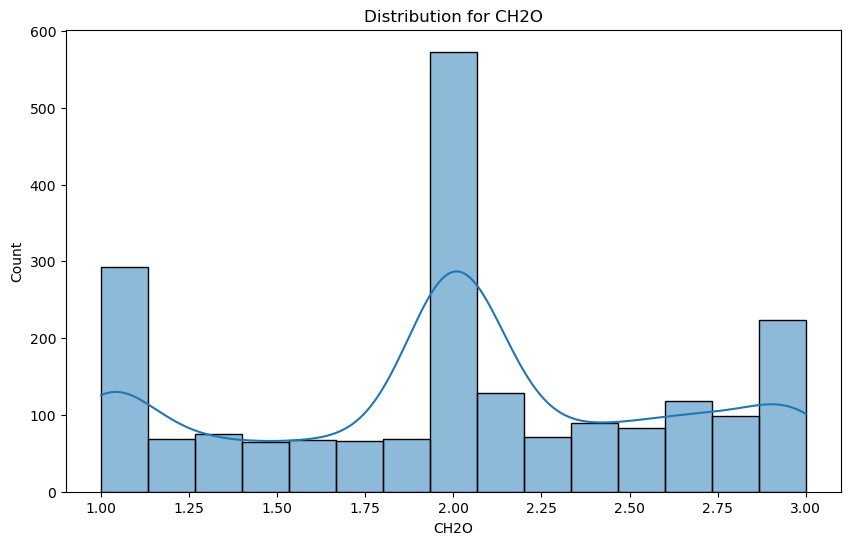

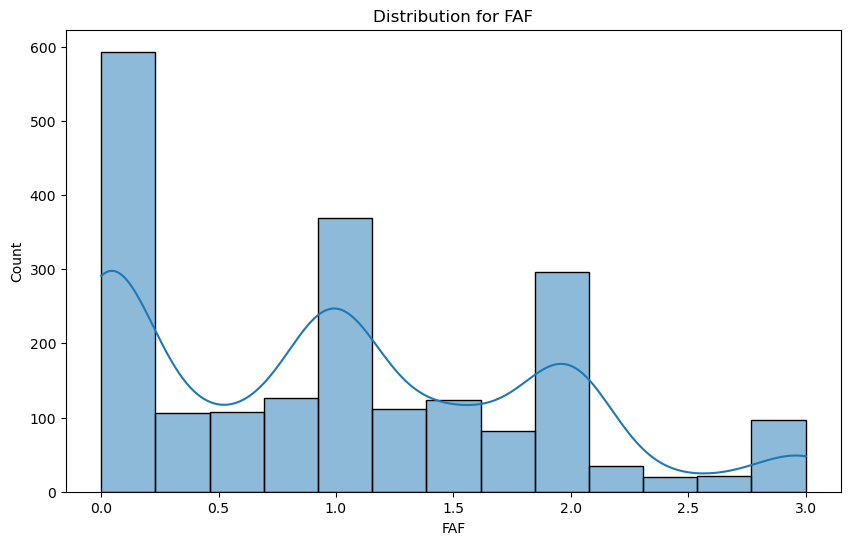

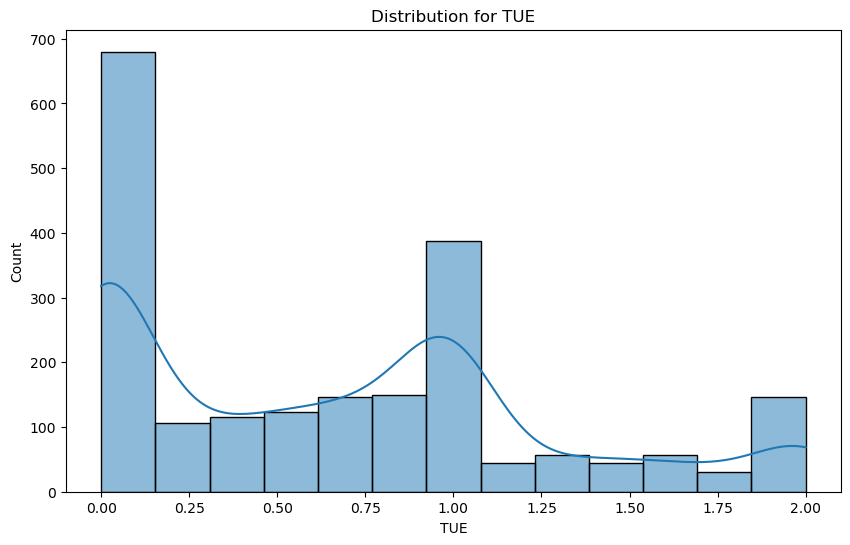

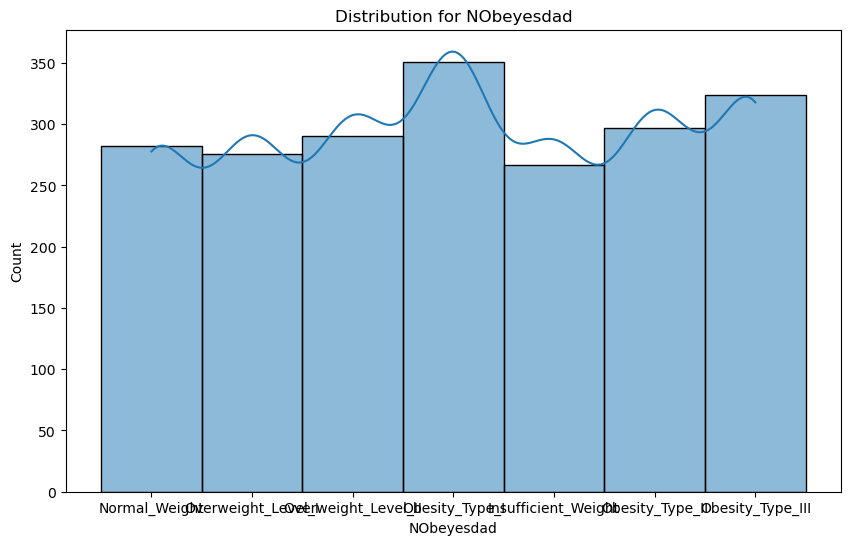

In [32]:
# Check the disstribution of data
for col in continuous_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution for {col}')
    plt.show()

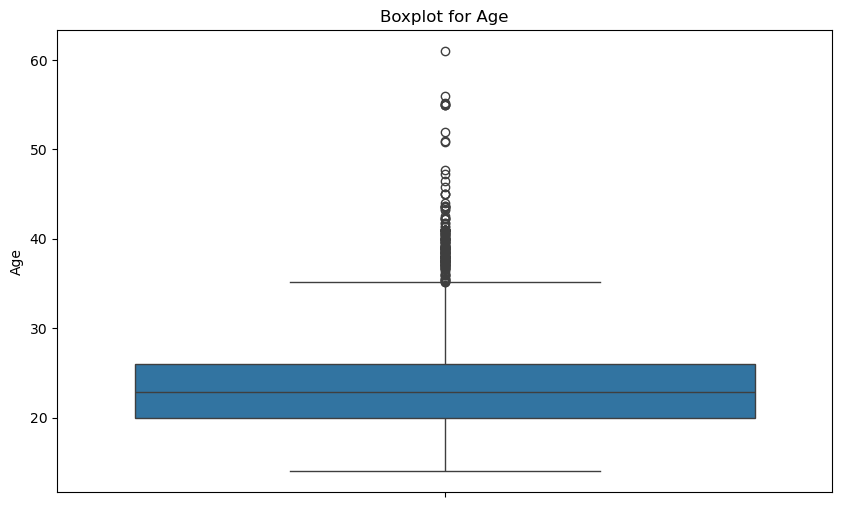

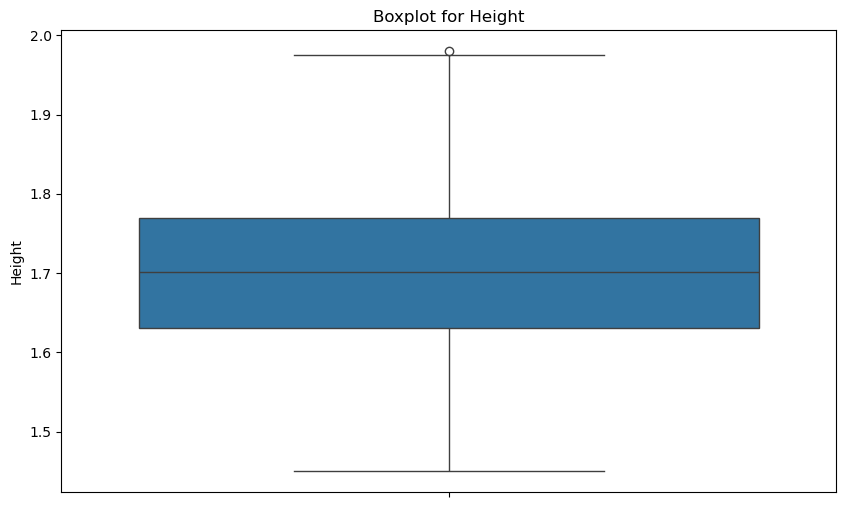

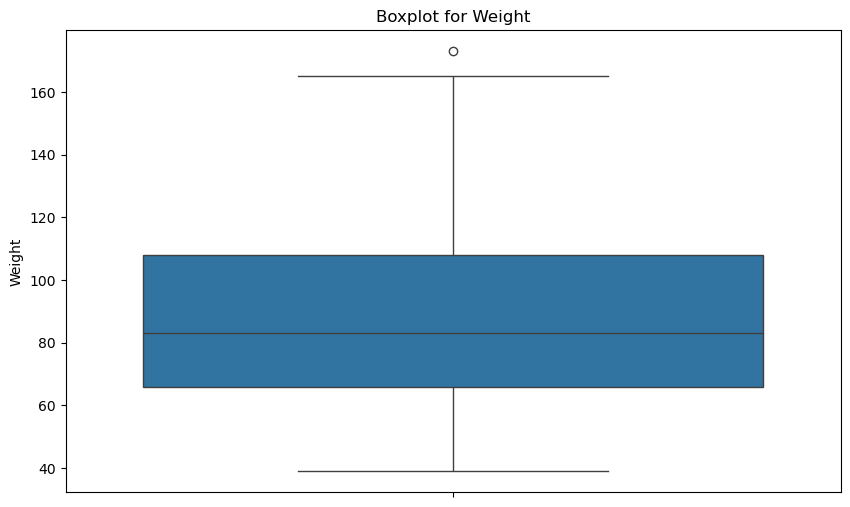

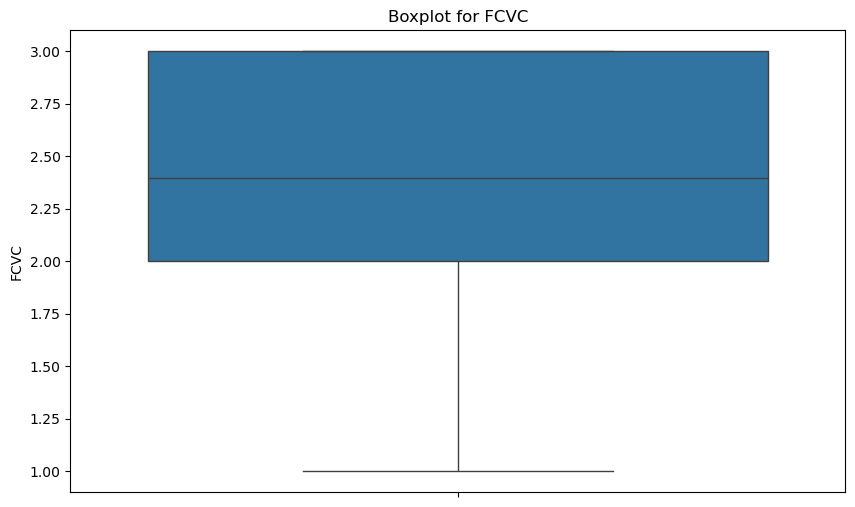

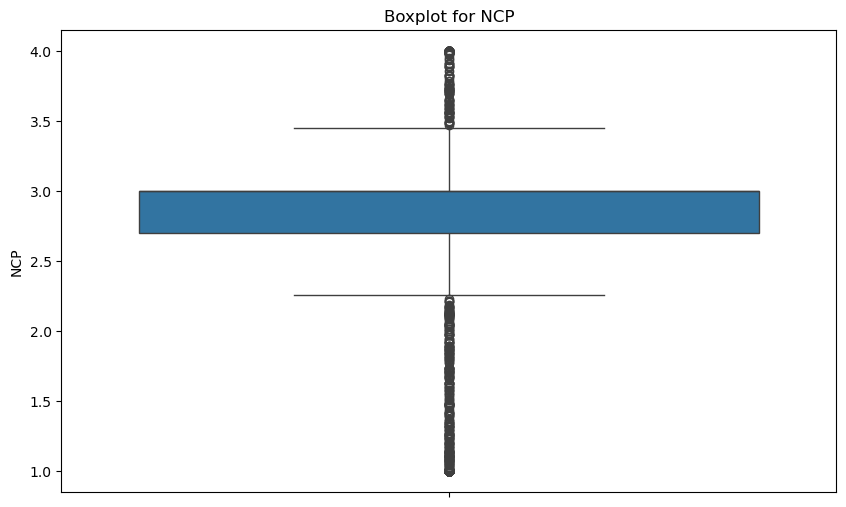

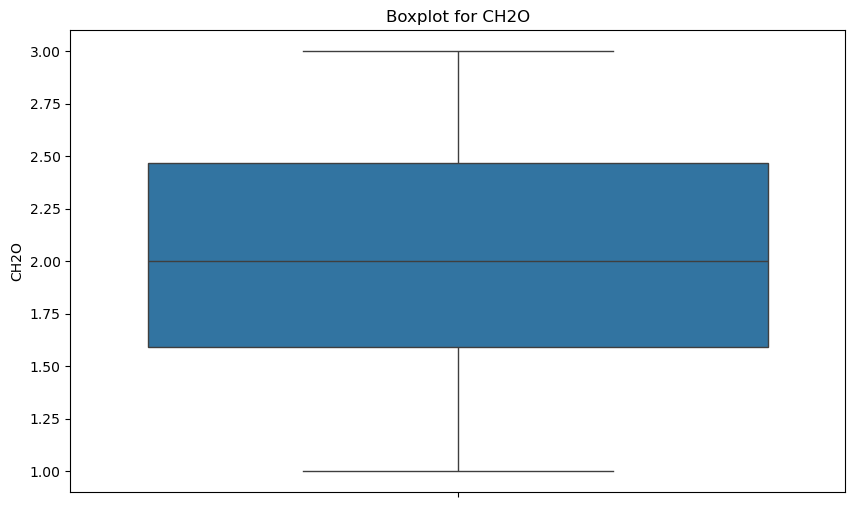

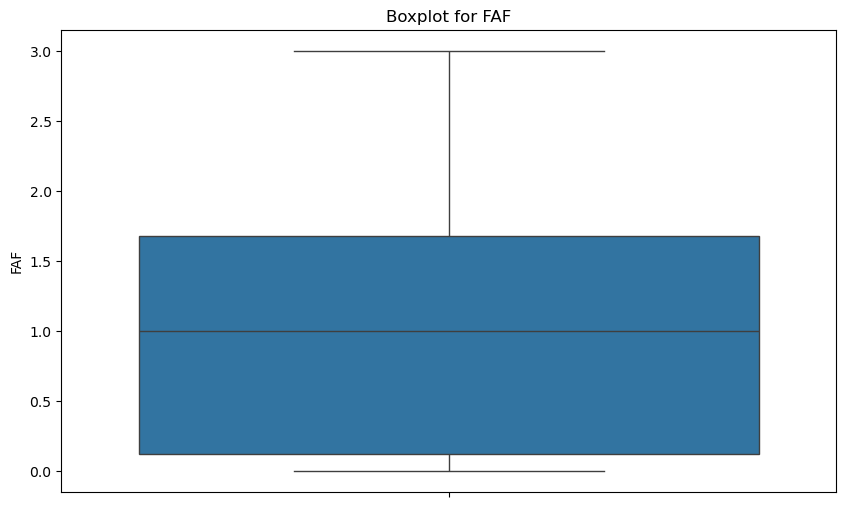

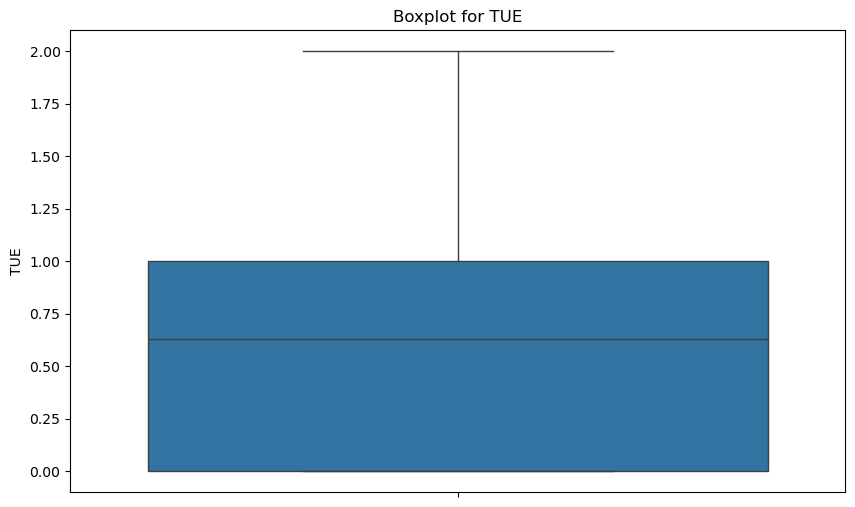

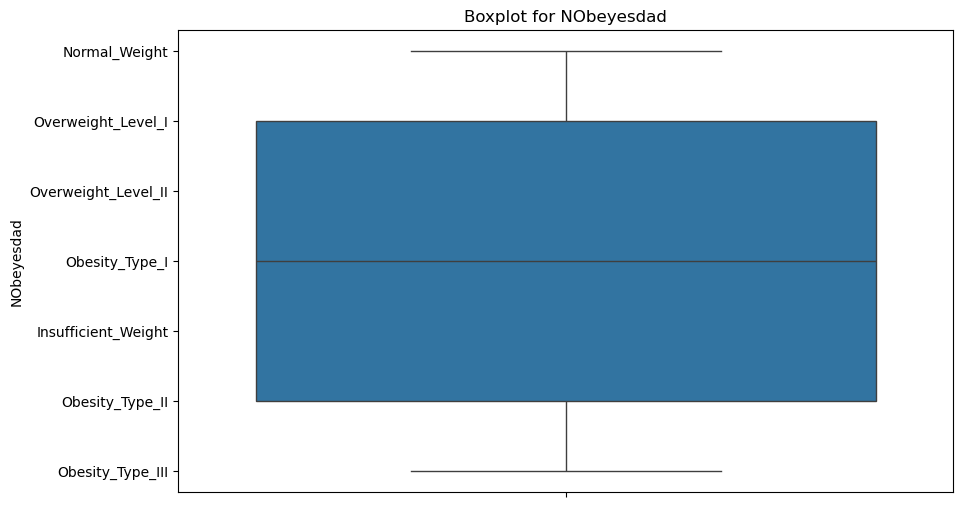

In [33]:
for col in continuous_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [34]:
#encoding binary columns
df_prep = pd.get_dummies(df, columns=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
df_prep.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False


In [35]:
#segeregating x and y
df_prep.drop('NObeyesdad', axis =1, inplace = True)

In [36]:
#replacing binary with int
# df_prep = df_prep.replace({True: 1, False: 0})
df_prep = df_prep.replace({True: 1, False: 0}).infer_objects(copy=False)

df_prep.head()

C:\Users\bitka\AppData\Local\Temp\ipykernel_10020\2934118111.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [37]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset 
df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

# Selecting relevant features
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
df = df[features]

# Initialize the Dash app
app = dash.Dash(__name__)
server = app.server  # For deployment

# Define app layout
app.layout = html.Div([
    html.H1("Obesity Levels Dashboard", style={'textAlign': 'center', 'fontWeight': 'bold', 'fontSize': 30}),
    
    # Dropdown for selecting a feature
    html.Label("Select a Feature to Visualize Against Obesity Level:", style={'fontWeight': 'bold'}),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in features if col != 'NObeyesdad'],
        value='Age',
        clearable=False
    ),
    
    dcc.Graph(id='visualization-output'),
])

# Define callback to update graph
@app.callback(
    Output('visualization-output', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_graph(selected_feature):
    if selected_feature in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC']:
        fig = px.box(df, x='NObeyesdad', y=selected_feature, color='NObeyesdad',
                     title=f'Distribution of {selected_feature} Across Obesity Levels')
    else:
        fig = px.histogram(df, x=selected_feature, color='NObeyesdad', barmode='group',
                           title=f'{selected_feature} Distribution by Obesity Level')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8054)